In [78]:
# Import libraries
import requests
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt

In [75]:
# Load API key from .env file
load_dotenv()
API_KEY = os.getenv("NEWS_API_KEY")

# Optional fallback if env fails
if not API_KEY:
    API_KEY = "7a794f6feb4e43368d9aad02515e1fcb"
    print("Loaded API key from hardcoded fallback")

Loaded API key from hardcoded fallback


In [76]:
# Set date range for the last 7 days
to_date = datetime.utcnow().date()
from_date = to_date - timedelta(days=7)

# Set search parameters
QUERY = 'Manchester United'
LANG = 'en'
PAGE_SIZE = 100

# Function to fetch news articles
def fetch_news(query, from_date, to_date, api_key, page_size=100):
    url = 'https://newsapi.org/v2/everything'
    all_articles = []
    for page in range(1, 6):
        params = {
            'q': query,
            'from': from_date,
            'to': to_date,
            'language': LANG,
            'pageSize': page_size,
            'page': page,
            'sortBy': 'publishedAt',
            'apiKey': api_key
        }
        response = requests.get(url, params=params)
        data = response.json()

        if data.get("status") != "ok":
            print("Error:", data.get("message"))
            break

        articles = data.get("articles", [])
        if not articles:
            break
        all_articles.extend(articles)
    return all_articles

In [77]:
# Fetch articles from the News API
articles = fetch_news(QUERY, from_date.isoformat(), to_date.isoformat(), API_KEY)

# Convert articles to a pandas Dataframe
df = pd.DataFrame([{
    'title': article['title'],
    'description': article['description'],
    'source': article['source']['name'],
    'published_at': article['publishedAt'],
    'url': article['url'],
    'content': article['content']
} for article in articles])

# Save Dataframe to CSV
df.to_csv("Manchester United.csv", index=False)
print(f"{len(df)} articles saved to 'Manchester United.csv'")

Error: You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.
95 articles saved to 'Manchester United.csv'


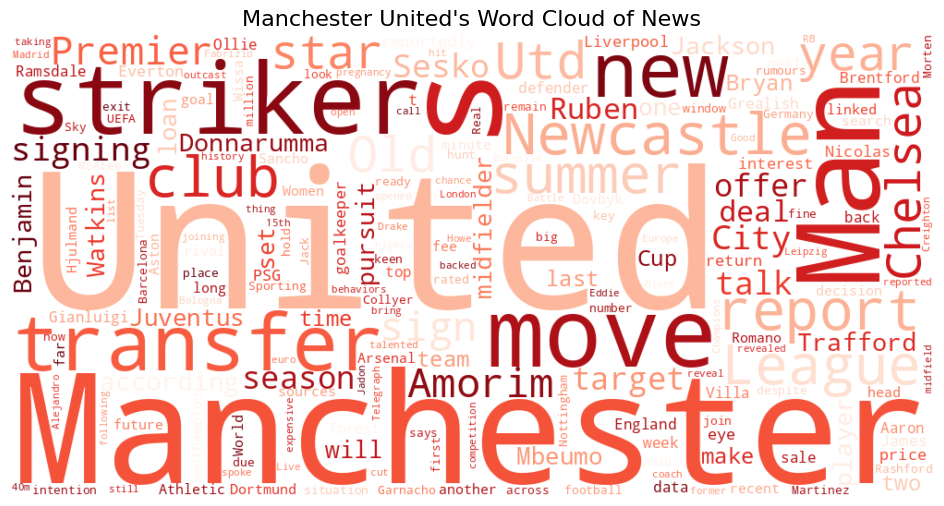

In [82]:
# Combine title and description text for Word Cloud
text_data = df['title'].fillna('') + ' ' + df['description'].fillna('')
combined_text = ' '.join(text_data.tolist())

# generate Word Cloud
wordcloud = wc(width=1000, height=500, background_color='white', collocations=False, colormap='Reds').generate(combined_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Manchester United's Word Cloud of News", fontsize=16)
plt.show()